In [1]:
import scipy.ndimage as nd
from scipy.misc import imread 

import numpy as np
from numpy.linalg import inv,lstsq
from pylab import *
%pylab 


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'power', 'fft', 'linalg', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


6 6 [0.0, 15.716280608611157, 31.88323798320786, 51.28323798320786, 70.89526455128131, 94.17962065829806]


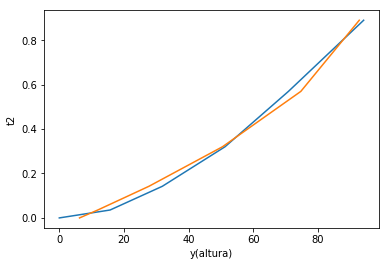

[  6.26245398 161.01602347 -71.63911566]


In [138]:

imam=imread("Bolas1.tif")
imr=imread("Bolas2.tif")

imflam=np.asarray(imam,dtype=np.float32) #las vuelve flotante
imflr=np.asarray(imr,dtype=np.float32) #las vuelve flotante

# las convierte a escalas de grises 
imbgam=(imflam[:,:,0]+imflam[:,:,1]+imflam[:,:,2])/3
imbgr=(imflr[:,:,0]+imflr[:,:,1]+imflr[:,:,2])/3

# quita el ruido 
im_filam=nd.median_filter(imbgam,(3,3))
im_filr=nd.median_filter(imbgr,(3,3))

#binarizar
imbinam=where(im_filam<100,0,255)
imbinr=where(im_filr<40,0,255)

#imshow(imbinr,cmap="gray")

#darle numero a cada bola para econtrar asi el centro de masa
imnumam,nam=nd.label(imbinam)
imnumr,nr=nd.label(imbinr)
#imshow(imnumr,cmap="gray")
#colorbar()

#encuentra los certro de masa
pxam=nd.measurements.center_of_mass(imbgam,imnumam, [2,3,4,5,6,7,8])
pxr=nd.measurements.center_of_mass(imbgr,imnumr, [3,4,5,6,7,8])


#print yr

yr=[]

dx=0.2 #milimetros
b=len(pxr)
for i in range(b):
    yr.append((pxr[i][0]-pxr[0][0])*dx)
    

t=[]
f=5.3
t0=0.0
for i in range(len(yr)):
    t.append(i*(1/f))

      
t2=[]
for j in range(len(t)):
    t2.append(t[j]*t[j])


    

print(len(yr),len(x),yr)
#minimos cuadrados

    
x=np.array(t2)
y=np.array(yr)
#print(x)
#x=np.linspace(0,15,10)
#y=10+4.566*x+5.67*x**2+0*np.random.random(x.shape)


f=[]
f.append(lambda x:np.ones_like(x))
f.append(lambda x:x)
f.append(lambda x:x**2)

Xt=[]

for fu in f:
    Xt.append(fu(x))
    
Xt= np.array(Xt)
X=Xt.transpose()



a = np.dot(np.dot(inv(np.dot(Xt,X)),Xt),y)

#print(a)

#print(lstsq(X,y)[0])
#print(X)

plot(y,x)

y1=0
for n,ac in enumerate(a):
    #print n, ac,x
    y1=y1+ac*x**n
    #print y1
plot(y1,x)
plt.ylabel("t2")
plt.xlabel("y(altura)")

show()
print(a)

#corregir el inicio, revisar el cuaderno donde estan l0os calculos de x0 y t0
#se supone que al agragar eso deberia dar la gravedad

In [139]:
a[2]

-71.63911565804634

In [140]:
a[2]*2/(100*10)

-0.14327823131609269

In [141]:
9.8*100*10

9800.000000000002

In [142]:
t

[0.0,
 0.18867924528301888,
 0.37735849056603776,
 0.5660377358490567,
 0.7547169811320755,
 0.9433962264150944]

In [143]:
t2

[0.0,
 0.0355998576005696,
 0.1423994304022784,
 0.3203987184051265,
 0.5695977216091136,
 0.8899964400142399]

In [144]:
yr

[0.0,
 15.716280608611157,
 31.88323798320786,
 51.28323798320786,
 70.89526455128131,
 94.17962065829806]

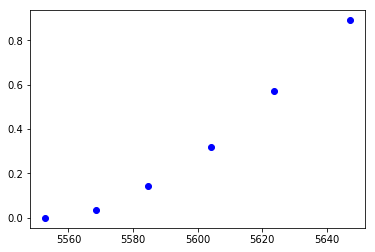

In [57]:
import matplotlib.pyplot as plt
plot(yr,t2,"bo")
show()


In [145]:
yr,t2

([0.0,
  15.716280608611157,
  31.88323798320786,
  51.28323798320786,
  70.89526455128131,
  94.17962065829806],
 [0.0,
  0.0355998576005696,
  0.1423994304022784,
  0.3203987184051265,
  0.5695977216091136,
  0.8899964400142399])

In [59]:
31.883237983207859*2/(0.1423994304022784)

447.80007747415436

In [60]:
15.716280608611157*2/(0.0355998576005696)

882.9406445917748

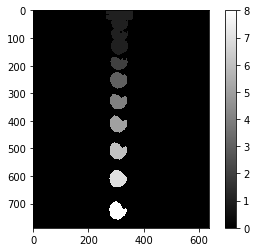

In [146]:
imshow(imnumr,cmap="gray")
colorbar()
show()


In [147]:
pxr

[(256.09069045099915, 307.44535828985113),
 (334.67209349405493, 305.9598330794679),
 (415.50688036703843, 304.3322305885573),
 (512.5068803670384, 303.3322305885573),
 (610.5670132074057, 302.59696715950884),
 (726.9887937424894, 300.5525931685678)]

In [134]:
1/5.3*5.845

1.1028301886792453

In [65]:
pxr[0][0]

256.09069045099915

In [137]:
0.5*9810*6.5*t0*t0

332.91789758629886

In [98]:
t0=pow(2*0.2*pxr[0][0]/9810,0.5)
t0

0.10218623250815129

In [110]:
v0=9810*pow(2*0.2*pxr[0][0]/9810,0.5)
v0

1002.4469409049641

In [103]:
v1=pow(2*9810*0.2*pxr[0][0],0.5)
v1

1002.4469409049641

In [120]:
xk=pxr[0][0]*0.2+v0*3*t0+0.5*9810*pow(3*t0,2)
xk

819.4902094431972

In [115]:
xk/0.2

256.09069045099915